In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from math import ceil

In [2]:
# data = pd.read_csv("fods_1.csv").to_numpy()
data = pd.read_csv("fods_1.csv")

In [3]:
training_data = data.sample(frac = 0.8)
test_data = data.drop(training_data.index)
# np.random.shuffle(data)
# N = data.shape[0]

training_data = training_data.to_numpy()
test_data = test_data.to_numpy()

# N_train = ceil(N * 0.8)
# N_test = N - N_train

X_train = training_data[:, :2].T
Y_train = training_data[:,2].T

X_test = test_data[:,:2].T
Y_test = test_data[:,2].T

N_train = len(X_train[0])
N_test = len(X_test[0])

print(N_train, N_test)

437 109


In [4]:
def normalize (X):

    mean = np.array(np.mean(X[1:, :], axis = 1)).reshape([len(X) - 1, 1])
    std = np.array(np.std(X[1:, :], axis = 1)).reshape([len(X) - 1, 1])

    mean = np.concatenate((np.zeros([1,1]), mean), axis = 0)
    std = np.concatenate((np.ones([1,1]), std), axis = 0)

    mean = np.repeat(mean, len(X[0]), axis = 1)
    std = np.repeat(std, len(X[0]), axis = 1)

    X = (X - mean) / std

    return X


In [5]:
def generate_feature_matrix(X, deg):

    mat = np.ones([1,len(X[0])])
    for i in range (1, deg + 1):
        for j in range(i+1):
            k = i - j
            newRow = np.array((X[0]**j) * (X[1]**k)).reshape([1, len(X[0])])
            mat = np.concatenate((mat, newRow), axis = 0)
            
    return normalize(mat)
    # return mat

In [6]:
def loss_function(Y, X, W):
    return np.sum(1 / (2 * len(X[0])) * np.power((Y - W.T @ X), 2))

In [7]:
def gradient_descent(Y, X, W, alpha, iterations):
    
    N = len(X[0])
    cost = np.zeros(iterations)

    for i in range(iterations):
        W = W + (alpha / N)*(X @ (Y - W.T @ X).T)
        cost[i] = loss_function(Y, X, W)
    
    return W, cost

In [8]:
def training_polynomial_regression(Y, X):

    error_history = np.zeros([10, 1])
    W_history = []

    for i in range(10):

        count = (i + 1) * (i + 2) / 2
        count = int(count)

        _X = X[:count, :]
        W = np.zeros([count, 1])

        iterations = 10000
        alpha_array = []
        final_cost_array = []

        alpha = 0.1

        while(alpha >= 0.001):

            W_grad, cost_grad = gradient_descent(Y, _X, W, alpha, iterations)
            rounded_cost = float("{:.4f}".format(cost_grad[len(cost_grad) - 1]))
            alpha_array.append(alpha)
            final_cost_array.append(rounded_cost)

            alpha -= 1e-3
        
        # alpha = 0.04

        # W_grad, cost_grad = gradient_descent(Y, _X, W, alpha, iterations)

        # grad_descent_graph = np.array([i for i in range (len(cost_grad))])

        # title_string = "Polynomial Regression for degree " + str(i)
        # rounded_cost = float("{:.4f}".format(cost_grad[len(cost_grad) - 1]))

        # error_history[i][0] = rounded_cost 
        # W_history[i] = W_history[i].reshape([1, len(W_grad)])
        # W_history.append(W_grad.reshape([len(W_grad)]))

        # plt.plot(grad_descent_graph, cost_grad)
        # plt.title(title_string)
        # plt.xlabel("Iterations")
        # plt.ylabel("Error")
        # plt.show()

        plt.plot(alpha_array, final_cost_array)
        plt.show()

    return error_history, W_history

In [9]:
def testing_polynomial_regression(Y, X, W):

    error_history = np.zeros([10, 1])

    for i in range(10):

        count = (i + 1) * (i + 2) / 2
        count = int(count)

        _X = X[:count, :]

        # print(type(W[i]))
        
        error_history[i][0] = loss_function(Y, _X, W[i])
    
    return error_history

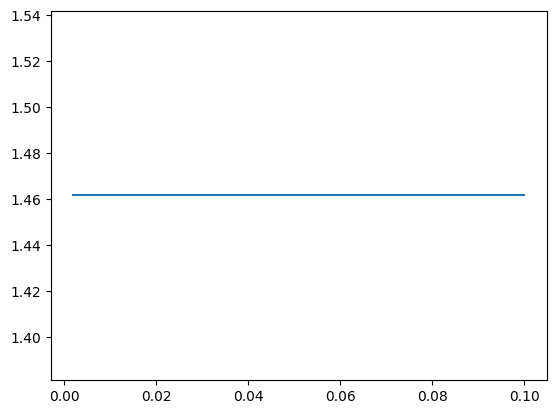

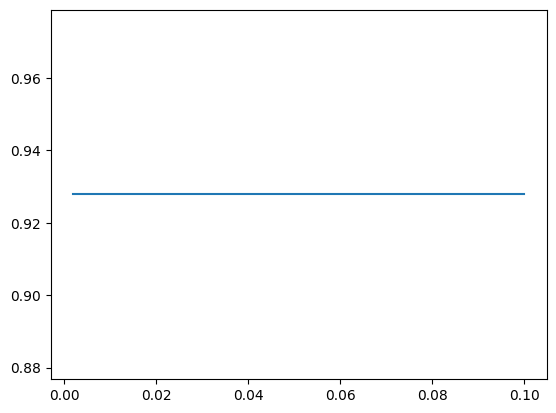

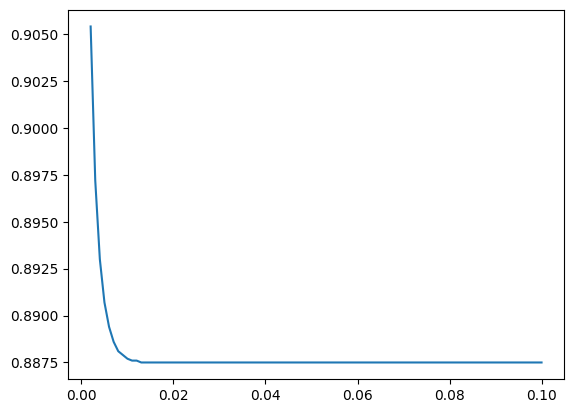

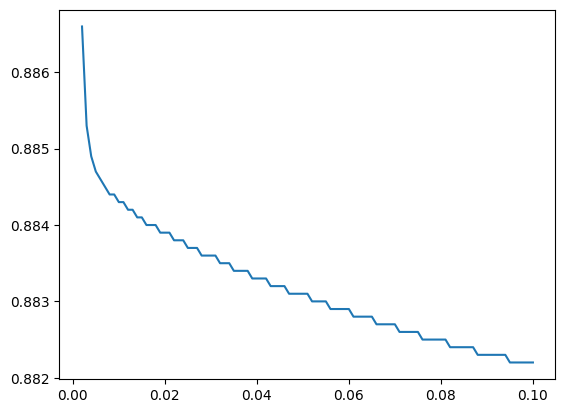

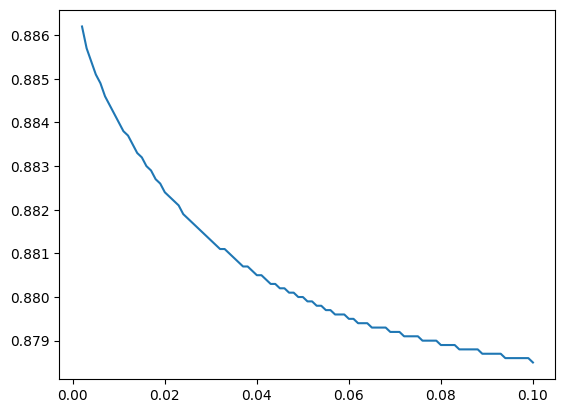

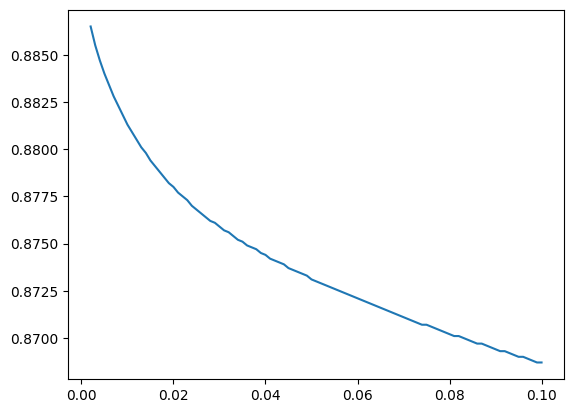

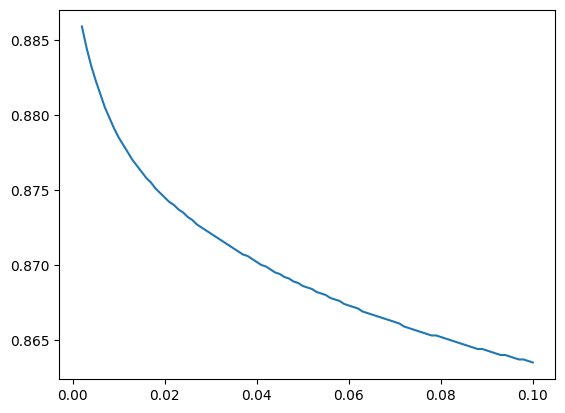

C:\Users\Sriram\AppData\Local\Temp\ipykernel_8996\426108206.py:2: RuntimeWarning: overflow encountered in power
  return np.sum(1 / (2 * len(X[0])) * np.power((Y - W.T @ X), 2))
C:\Users\Sriram\AppData\Local\Temp\ipykernel_8996\1292089943.py:7: RuntimeWarning: overflow encountered in matmul
  W = W + (alpha / N)*(X @ (Y - W.T @ X).T)
C:\Users\Sriram\AppData\Local\Temp\ipykernel_8996\426108206.py:2: RuntimeWarning: invalid value encountered in matmul
  return np.sum(1 / (2 * len(X[0])) * np.power((Y - W.T @ X), 2))
C:\Users\Sriram\AppData\Local\Temp\ipykernel_8996\1292089943.py:7: RuntimeWarning: invalid value encountered in matmul
  W = W + (alpha / N)*(X @ (Y - W.T @ X).T)


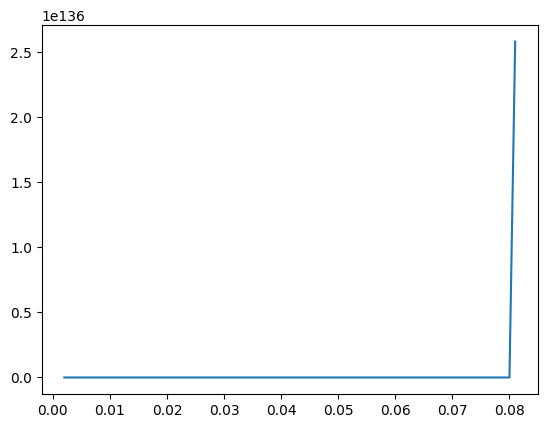

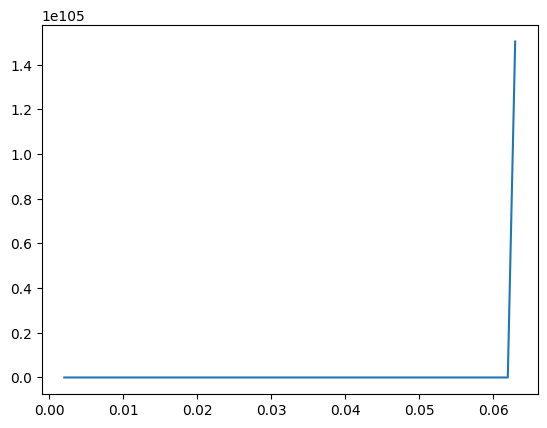

C:\Users\Sriram\AppData\Local\Temp\ipykernel_8996\1292089943.py:7: RuntimeWarning: invalid value encountered in add
  W = W + (alpha / N)*(X @ (Y - W.T @ X).T)


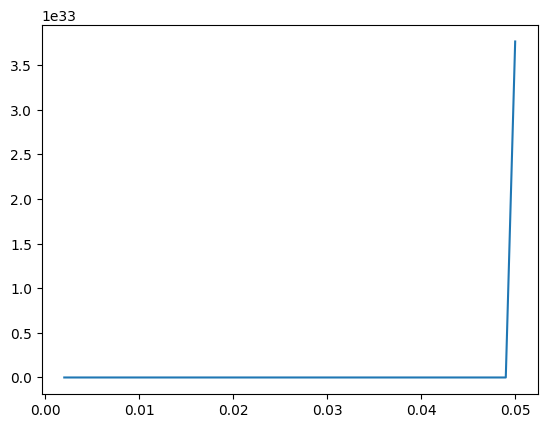

In [10]:
X = generate_feature_matrix(X_train, 9)
training_error, W = training_polynomial_regression(Y_train, X)

In [11]:
X = generate_feature_matrix(X_test, 9)
W = [i.reshape([len(i), 1]) for i in W]
testing_error = testing_polynomial_regression(Y_test, X, W)

rounded_test_error = [float("{:.3f}".format(testing_error[i][0])) for i in range(10)]

plt.plot([i for i in range(10)], rounded_test_error, marker = 'o')
plt.xticks([i for i  in range(10)])
plt.xlabel("Degree")
plt.ylabel("Testing Error")
plt.show()

IndexError: list index out of range

In [ ]:
degrees = np.array([i for i in range(10)]).reshape([10,1])
polynomial_regression_result = np.concatenate((degrees, training_error, testing_error), axis = 1)

In [ ]:
polynomial_regression_table = pd.DataFrame(polynomial_regression_result, columns = ['Degree', 'Training Error', 'Testing Error'])
polynomial_regression_table

,Degree,Training Error,Testing Error
0,0.0,1.3695,1.442030
1,1.0,0.8666,1.101174
2,2.0,0.8361,1.067165
3,3.0,0.8277,1.066860
4,4.0,0.8240,1.068683
5,5.0,0.8206,1.186131
6,6.0,0.8191,1.226435
7,7.0,0.8175,1.670797
8,8.0,0.8157,1.740331
9,9.0,0.8137,2.412551
